In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'astro-lsst-01_2013.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
for filtername in ['u', 'g', 'r', 'i', 'z', 'y']:
    metric = metrics.Coaddm5Metric(metricName='undithered')
    slicer = slicers.HealpixSlicer()
    sql = 'filter = "%s"' % filtername
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
    
    #metric = metrics.Coaddm5Metric(metricName='dithered')
    #slicer = slicers.HealpixSlicer(lonCol='hexDitherPerNightRa', latCol='hexDitherPerNightDec')
    #bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with constraint filter = "u" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 176771 visits
Running:  ['opsim_undithered_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 230391 visits
Running:  ['opsim_undithered_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "z" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 492894 visits
Running:  ['opsim_undithered_z_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" for columns ['fiveSigmaDepth', 'fieldRA', 'fieldDec']
Found 507717 visits
Running:  ['opsim_undithered_r_HEAL']
Completed metric generat

Plotting figures with "filter = "u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 510 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 25.6611  dipole: lon: 118.654, lat: 63.9656, amp: 0.253977
Plotting complete.
Plotting figures with "filter = "g"" constraint now.
monopole: 26.7886  dipole: lon: -138.055, lat: -76.5524, amp: 0.355354
Plotting complete.
Plotting figures with "filter = "z"" constraint now.
monopole: 25.3627  dipole: lon: 138.885, lat: -77.8712, amp: 0.251772
Plotting complete.
Plotting figures with "filter = "r"" constraint now.
monopole: 26.8297  dipole: lon: 159.51, lat: -74.762, amp: 0.177565
Plotting complete.
Plotting figures with "filter = "i"" constraint now.
monopole: 26.271  dipole: lon: 179.103, lat: -76.721, amp: 0.144452
Plotting complete.
Plotting figures with "filter = "y"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 468 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 24.9347  dipole: lon: 101.845, lat: 60.7707, amp: 0.480104
Plotting complete.


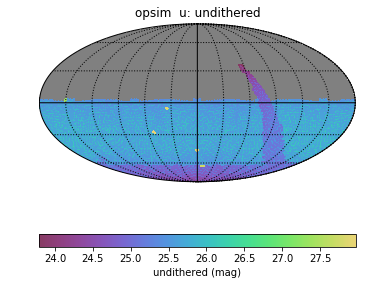

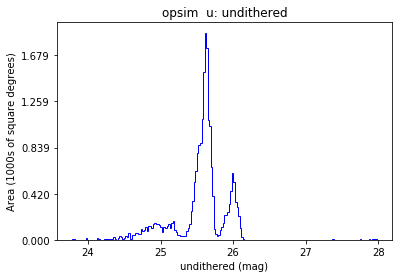

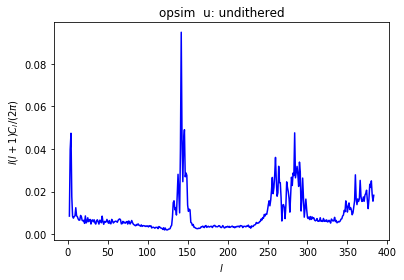

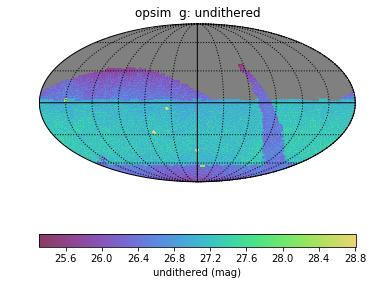

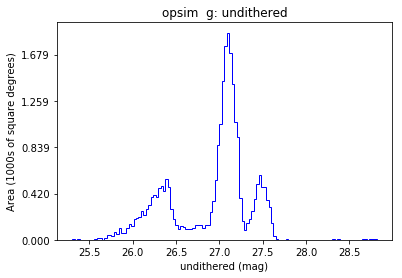

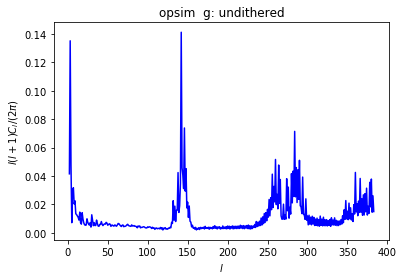

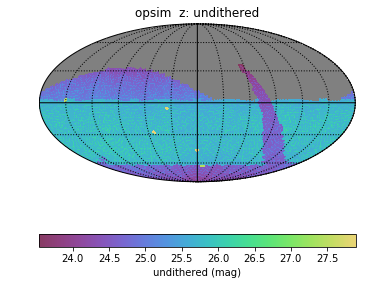

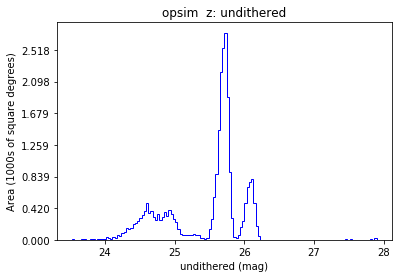

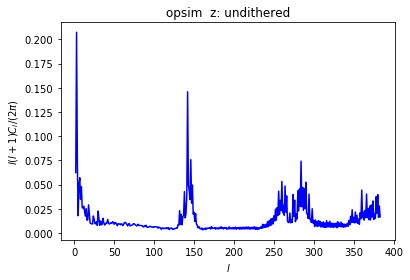

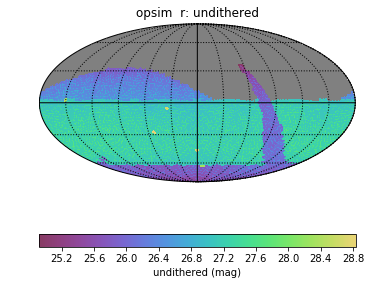

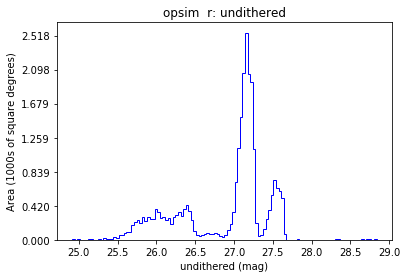

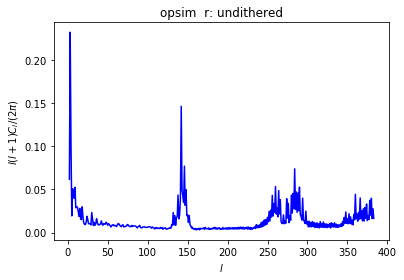

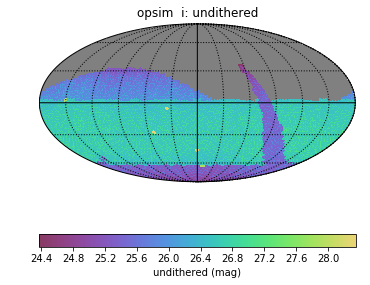

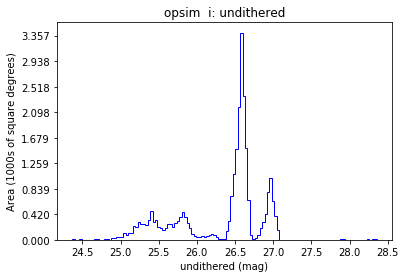

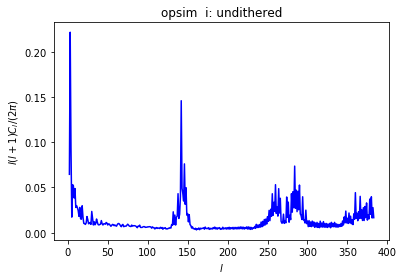

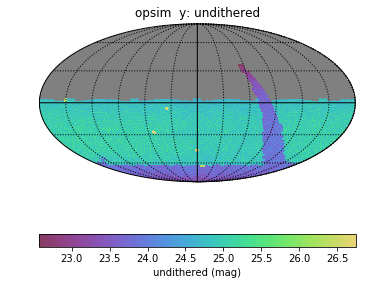

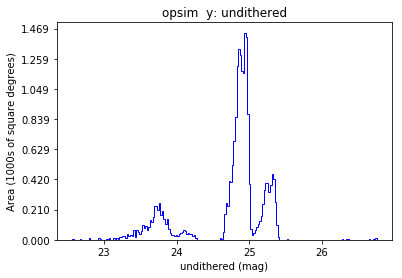

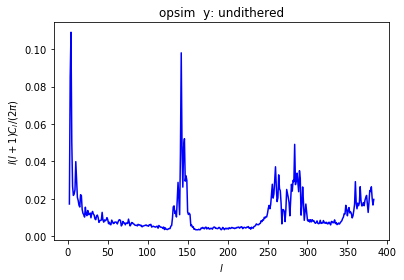

In [5]:
bg.plotAll(closefigs=False)

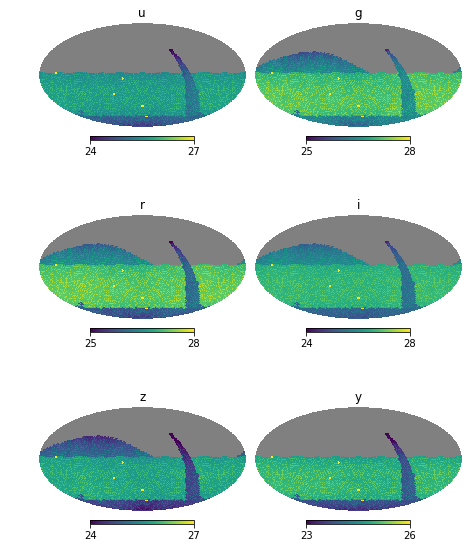

In [10]:
limits = {'u':[24, 27], 'g':[25,28], 'r':[25,28], 'i':[24,28], 'z':[24,27], 'y':[23,26]}
positions = [1,4,2,5,3,6]
counter = 0
plt.figure(1, figsize=(6,8))
for bundle,fn in zip(bundleList,['u', 'g', 'r', 'i', 'z', 'y']):
    hp.mollview(bundle.metricValues, fig=1, sub=(3,2,counter+1), min=limits[fn][0], max=limits[fn][1], title=fn)
    counter += 1
plt.savefig('OpSim10yrs_skymap.pdf',  bbox_inches="tight")

In [7]:
dbFile = 'feature_baseline_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.Database(dbFile, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [8]:
bundleList2 = []
for filtername in ['u', 'g', 'r', 'i', 'z', 'y']:
    metric = metrics.Coaddm5Metric(metricName='', m5Col='fivesigmadepth')
    slicer = slicers.HealpixSlicer(latCol='dec', lonCol='RA')
    sql = 'filter = "%s"' % filtername
    bundleList2.append(metricBundles.MetricBundle(metric,slicer,sql))
bd = metricBundles.makeBundlesDictFromList(bundleList2)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint filter = "u" for columns ['dec', 'fivesigmadepth', 'RA']
Found 159252 visits
Running:  ['opsim_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "g" for columns ['dec', 'fivesigmadepth', 'RA']
Found 245015 visits
Running:  ['opsim_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "z

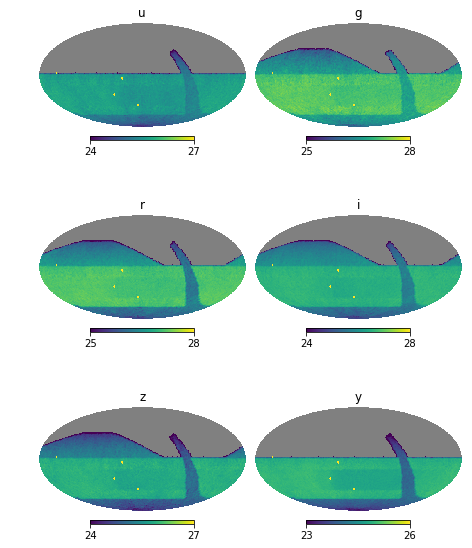

In [11]:
limits = {'u':[24, 27], 'g':[25,28], 'r':[25,28], 'i':[24,28], 'z':[24,27], 'y':[23,26]}
positions = [1,4,2,5,3,6]
counter = 0
plt.figure(2, figsize=(6,8))
for bundle,fn in zip(bundleList2,['u', 'g', 'r', 'i', 'z', 'y']):
    hp.mollview(bundle.metricValues, fig=2, sub=(3,2,counter+1), min=limits[fn][0], max=limits[fn][1], title=fn)
    counter += 1
plt.savefig('FB10yrs_skymap.pdf',  bbox_inches="tight")

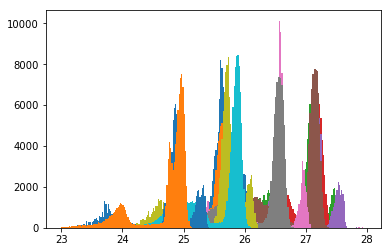

In [10]:
bin_dict = {}
counts_dict = {}
counts2_dict = {}
for i,fn in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    bins = np.arange(limits[fn][0], limits[fn][1], .02)
    counts, bins, ack = plt.hist(bundleList[i].metricValues, bins=bins)
    counts2, bins, ack = plt.hist(bundleList2[i].metricValues, bins=bins)
    bin_dict[fn] = bins
    counts_dict[fn] = counts
    counts2_dict[fn] = counts2

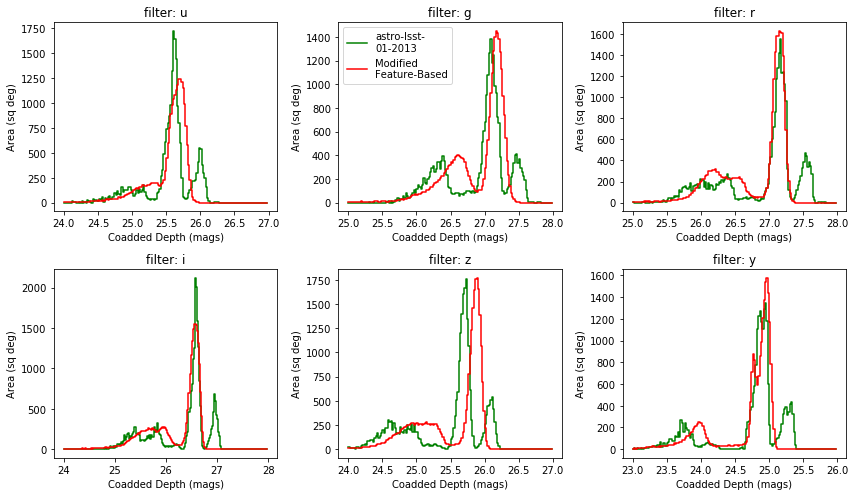

In [11]:
fig, axarr = plt.subplots(2,3, figsize=(12,7))
area = hp.nside2pixarea(hp.npix2nside(bundleList[0].metricValues.size), degrees=True)
for i,fn in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    i_arr = int(np.floor(i/3))
    j_arr = i % 3
    x  = np.array(list(zip(bin_dict[fn][0:-1], bin_dict[fn][1:]))).ravel()
    #x  = np.array(list(zip(bins[0:-1], bins[1:]))).ravel()
    y = np.array(list(zip(counts_dict[fn]*area, counts_dict[fn]*area))).ravel()                                                   
    #y = np.array(list(zip(counts*area, counts*area))).ravel()
    axarr[i_arr, j_arr].plot(x, y, color='g', label='astro-lsst-\n01-2013')
    y = np.array(list(zip(counts2_dict[fn]*area, counts2_dict[fn]*area))).ravel()
    axarr[i_arr, j_arr].plot(x, y, color='r', label='Modified \nFeature-Based')
    axarr[i_arr, j_arr].set_xlabel('Coadded Depth (mags)')
    axarr[i_arr, j_arr].set_ylabel('Area (sq deg)')
    axarr[i_arr, j_arr].set_title('filter: %s' % fn)
    if i == 1:
        axarr[i_arr, j_arr].legend(loc=0)
fig.tight_layout()
fig.savefig('Co_addedHist10yrs.pdf')

In [12]:
# Now to do the pair fraction plot
dbFile = 'astro-lsst-01_2013.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

bundleList = []
sql = '(filter="g" or filter="r" or filter="i")' 
metric = metrics.PairFractionMetric(mjdCol='observationStartMJD')
pairSlicer = slicers.HealpixSlicer()
bundleList.append(metricBundles.MetricBundle(metric, pairSlicer, sql))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint (filter="g" or filter="r" or filter="i") for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 1243515 visits
Running:  ['opsim_PairFraction_g_or_r_or_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [13]:
dbFile = 'feature_baseline_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.Database(dbFile, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)


bundleList2 = []
sql = '(filter="g" or filter="r" or filter="i")' 
metric = metrics.PairFractionMetric(mjdCol='mjd')
pairSlicer = slicers.HealpixSlicer(latCol='dec', lonCol='RA')
bundleList2.append(metricBundles.MetricBundle(metric, pairSlicer, sql))
bd = metricBundles.makeBundlesDictFromList(bundleList2)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint (filter="g" or filter="r" or filter="i") for columns ['RA', 'dec', 'mjd']
Found 1255416 visits
Running:  ['opsim_PairFraction_g_or_r_or_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


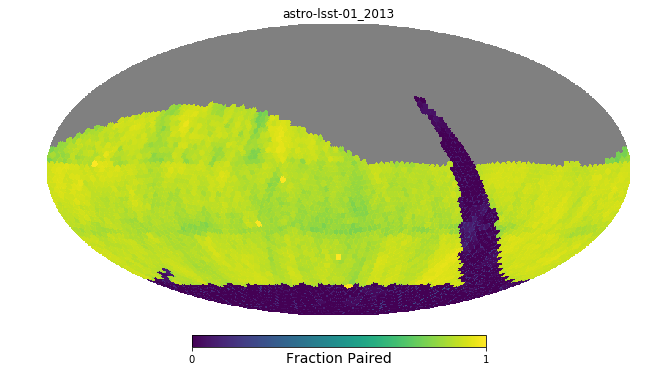

In [14]:

hp.mollview(bundleList[0].metricValues, min=0, max=1, unit='Fraction Paired',  title='astro-lsst-01_2013')
plt.savefig('OpSim10yrs_Pair_skymap.pdf')

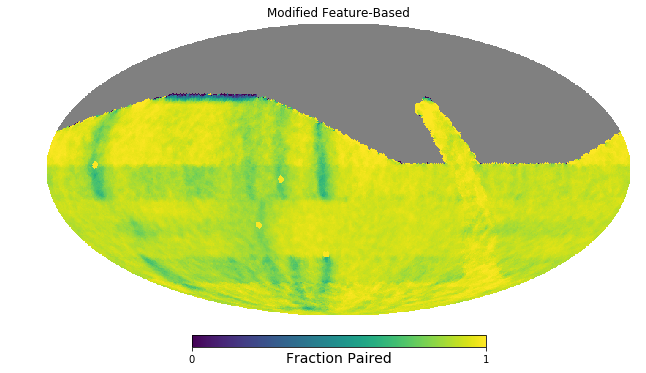

In [15]:
hp.mollview(bundleList2[0].metricValues, min=0, max=1, unit='Fraction Paired', title='Modified Feature-Based')
plt.savefig('FB10yrs_Pair_skymap.pdf')

In [16]:
nside = 128
area = hp.nside2pixarea(nside, degrees=True)

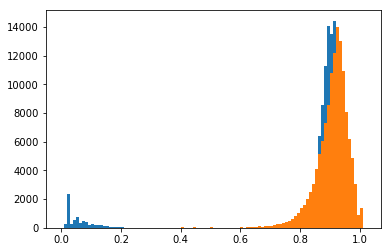

In [17]:
bins = np.arange(0,1.03,.01)
g1 = np.where(bundleList[0].metricValues.filled() != 0 )
g2 = np.where(bundleList2[0].metricValues.filled() != 0 )
c1, bins, ack = plt.hist(bundleList[0].metricValues.filled()[g1], bins=bins)
c2, bins, ack = plt.hist(bundleList2[0].metricValues.filled()[g2], bins=bins)

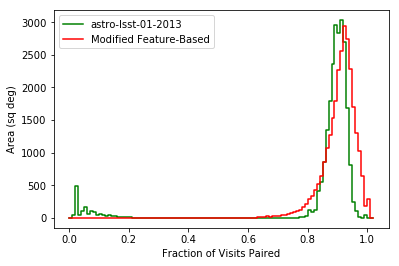

In [18]:
x = np.array(list(zip(bins[0:-1], bins[1:]))).ravel()
y1 = np.array(list(zip(c1,c1))).ravel()*area
y2 = np.array(list(zip(c2,c2))).ravel()*area
plt.plot(x, y1, 'g', label='astro-lsst-01-2013')
plt.plot(x, y2, 'r', label='Modified Feature-Based')
plt.legend()
plt.xlabel('Fraction of Visits Paired')
plt.ylabel('Area (sq deg)')
plt.savefig('PairHist.pdf')